# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

/Users/sondrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


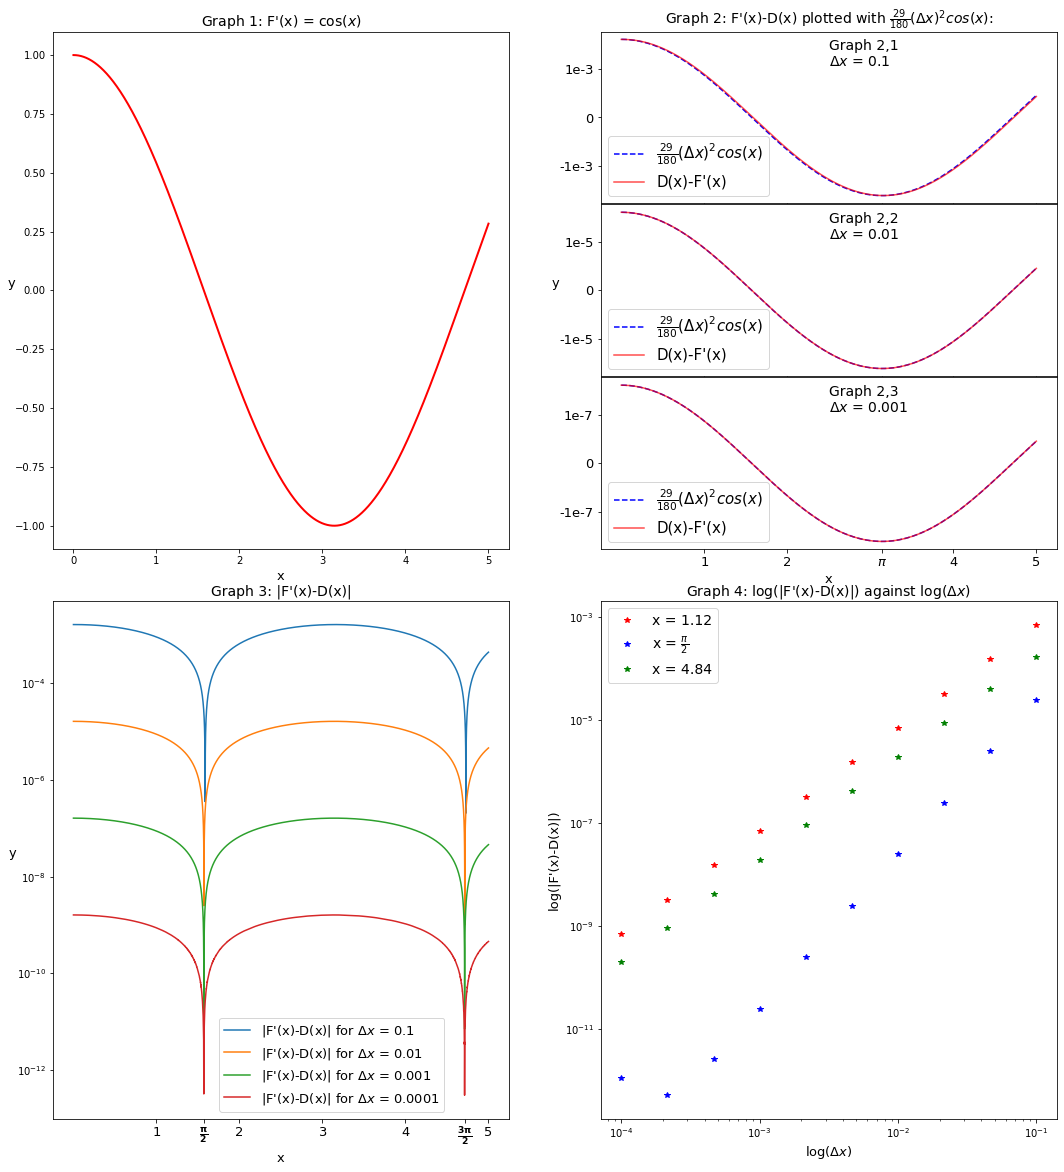

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec #import gridspec module to form more customised graphs

#See in the discussion below that error of expression D(x) (=(1)) can be written out using the Taylor expansion
#to get F'(x)-D(x)=-(29/180)(dx^2)(F'''(x))+O(dx^3) for sufficiently small dx.
#In other words, (1) is a second order accurate estimation of F'(x)

#Define an example function:
def F(x):
    return np.sin(x)

#and its exact derivative:
def f_prime(x):
    return np.cos(x)

#Define our finite difference approximation as function:
def fin_diff(f, x, dx):
    '''inputs are x, dx, and f (the function)'''
    alpha=np.array([-4/23, -9/17, 275/391])
    beta=np.array([-3/2, -1/3, 4/5])
    D=((alpha[0]*F(x+beta[0]*dx))+(alpha[1]*F(x+beta[1]*dx))+(alpha[2]*F(x+beta[2]*dx)))/dx
    return D

#Establish different step sizes we will test
dx=[0.1,0.01,0.001, 0.0001]

#Set up figure 
fig = plt.figure(figsize=(18,20))

'''The following way to format gridspec partially adapted from
https://stackoverflow.com/questions/34933905/matplotlib-adding-subplots-to-a-subplot
User: Suever
Date posted: January 21st, 2016
Date accessed: April 2nd, 2021'''

#Establish outer grid, within which subplots will be put
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.1)

#Establish four subplots. Notice that 'absolute_errors' subplot has 3 subplots of its own
exact_deriv = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
error_funcs = gridspec.GridSpecFromSubplotSpec(len(dx[:-1]), 1, subplot_spec=outer[1], hspace=0.006)
absolute_errors = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[2])
log_error_growth = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[3])

#Plot the exact derivative:
x=np.linspace(0, 5, 10001)
y0=f_prime(x)
ax1=plt.Subplot(fig, exact_deriv[0])
ax1.plot(x,y0, 'r', alpha=1, linewidth=2, label=r"$F'(x)$" + " exact")
ax1.set_title(r"Graph 1: F'(x) = $\cos(x)$", fontsize=14)
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('y', rotation='horizontal', fontsize=13)
fig.add_subplot(ax1)

#Plot error of approximation F'(x): Do this for each of three stepsizes in dx
#We plot each error together with -(29/180)(dx^2)(-cos(x)) to demonstrate that
#-(29/180)(dx^2)(-cos(x)) is a very good approximation of the error
for i in range(len(dx[:-1])):
    ax = plt.Subplot(fig, error_funcs[i])
    ax.plot(x, -(29/180)*(dx[i]**2)*(-np.cos(x)), 'b--', alpha=1, label=r"$\frac{29}{180} (\Delta x)^2 cos(x)$")
    ax.plot(x, f_prime(x)-fin_diff(F, x, dx[i]), 'r-', alpha=0.7, label=r"D(x)-F'(x)")
    ax.set_yticks([-10**(-3-2*i), 0, 10**(-3-2*i)])
    ax.set_yticklabels([f"-1e-{3+2*i}", 0, f"1e-{3+2*i}"], fontsize=13)
    ax.set_xticks([1,2,np.pi,4,5])
    ax.set_xticklabels([1,2, r"$\pi$", 4, 5], fontsize=13)
    ax.text(0.5,0.8,f"Graph 2,{i+1}\n" + r'$\Delta x$'+f" = {dx[i]}", transform=ax.transAxes, fontsize=14)
    if i==0:
        ax.set_title(r"Graph 2: F'(x)-D(x) plotted with $\frac{29}{180} (\Delta x)^2 cos(x)$:", fontsize=14)
    ax.legend(loc='lower left', fontsize=15)
    fig.add_subplot(ax)
    if i==1:
        ax.set_ylabel('y', rotation='horizontal', fontsize=13)
    if i==2:
        ax.set_xlabel('x', fontsize=13)

#Graph the absolute error across x in [0,5] for each of the four stepsizes
ax2=plt.Subplot(fig, absolute_errors[0])
for i in dx:
    ax2.plot(x, abs(f_prime(x)-fin_diff(F, x, i)), label="|F'(x)-D(x)| for " + r"$\Delta x$" + f" = {i}")
ax2.set_yscale('log')
ax2.set_ylabel('y', rotation='horizontal', fontsize=13)
ax2.set_xlabel('x', fontsize=13)
ax2.set_title("Graph 3: |F'(x)-D(x)|", fontsize=14)
ax2.set_xticks([1,np.pi/2, 2,3, 4,(3/2)*np.pi,5])
ax2.set_xticklabels([1,r"$\bf\frac{\pi}{2}$",2, 3, 4, r"$\bf\frac{3\pi}{2}$", 5], fontsize=13)
ax2.legend(loc='lower left', bbox_to_anchor=(0.35, 0.001), fontsize=13)
fig.add_subplot(ax2)  

#Pick some random points at which to investigate the absolute error BETWEEN step-sizes
np.random.seed(16)
x1=np.random.random()*(5-10**(-5))+10**(-5)

np.random.seed(4)
x3=np.random.random()*(5-10**(-5))+10**(-5)

#We choose one of these points to be pi/2 because this is where cos(x)=0
x2=np.pi/2

#Set up a new array of step sizes to generate more points. Make these points logarithmically spaced
dx=np.logspace(-1, -4, 10, base=10)

#Finally plot the last graph with log of absolute error of approximation against log of step size
ax3=plt.Subplot(fig, log_error_growth[0])
ax3.plot(dx, abs(f_prime(x1)-fin_diff(F, x1, dx)), 'r*', label=r'x = ' + str(round(x1, 2)))
ax3.plot(dx, abs(f_prime(x2)-fin_diff(F, x2, dx)), 'b*', label=r'x = $\frac{\pi}{2}$')
ax3.plot(dx, abs(f_prime(x3)-fin_diff(F, x3, dx)), 'g*', label=r'x = ' + str(round(x3, 2)))
ax3.set_yscale('log')
ax3.set_ylabel("log(|F'(x)-D(x)|)", fontsize=13)
ax3.set_xlabel(r'log($\Delta x$)', fontsize=13)
ax3.set_xscale('log', basex=10)
ax3.set_title(r"Graph 4: log(|F'(x)-D(x)|) against log($\Delta x$)", fontsize=14)
ax3.legend(fontsize=14)
fig.add_subplot(ax3)

#Show the plot!
fig.show()

In [3]:
#Cell to run polyfit on Graph 4. #See 1.1 discussion below

#Polyfit on red points:
print(f'Slope of Line-of-best-fit for ' + 'x = 1.12 in Graph 4: '\
    + f'{np.polyfit(np.log10(dx), np.log10(abs(f_prime(x1)-fin_diff(F, x1, dx))), 1)[0]}')

#Polyfit on green points:
print(f'Slope of Line-of-best-fit for ' + f'x = 4.84 in Graph 4: '\
    + f'{np.polyfit(np.log10(dx), np.log10(abs(f_prime(x3)-fin_diff(F, x3, dx))), 1)[0]}')

#Polyfit on blue points where we exclude the last 3 points due to potential rounding error in formula for 
#F'(X)-D(X) when cos(x)=0:
print(f'Slope of Line-of-best-fit for ' + r'x = pi/2 in Graph 4: '\
    + f'{np.polyfit(np.log10(dx)[:-3], np.log10(abs(f_prime(x2)-fin_diff(F, x2, dx)))[:-3], 1)[0]}')


Slope of Line-of-best-fit for x = 1.12 in Graph 4: 2.0032478818506507
Slope of Line-of-best-fit for x = 4.84 in Graph 4: 1.9858834189569547
Slope of Line-of-best-fit for x = pi/2 in Graph 4: 3.0003194571980596


***📝 Discussion for question 1.1 (added by author)***

We write 
$$
F' \left( x \right) \approx D(x) = \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right)
$$

where $D(x)$ is the name we will use to denote the finite difference approximnation with $N=3$ described above. 
We can rewrite $D(x)$ as

$$
D(x) = \frac{1}{\Delta x} \Bigg( \frac{-4}{23} F \left( x -\frac{3}{2} \Delta x \right) + \frac{-9}{17} F \left( x -\frac{1}{3} \Delta x \right) + \frac{275}{391} F \left( x + \frac{4}{5} \Delta x \right) \Bigg)
$$

Now, notice that since $23*17=391$, we can equivalently write

$$
D(x) = \frac{1}{391\Delta x} \Bigg( -68 F \left( x -\frac{3}{2} \Delta x \right) - 207 F \left( x -\frac{1}{3} \Delta x \right) + 275 F \left( x + \frac{4}{5} \Delta x \right) \Bigg)
$$

We can write out each $F \left( x + \beta \Delta x \right)$ as the Taylor expansion around $x$ with a Lagrange remainder. According to Lagrange Remainder (Weisstein, 2021), for some $\xi_{1}$ with $(x-\frac{3}{2}\Delta x)<\xi_{1}<x$, $\xi_{2}$ with $(x-\frac{1}{3}\Delta x)<\xi_{2}<x$, and $\xi_{3}$ with $x<\xi_{3}<(x+\frac{4}{5}\Delta x)$ we have

$$
F \left( x -\frac{3}{2} \Delta x \right) = F(x) + \frac{-3}{2} \Delta x F'(x) + \frac{(\frac{-3\Delta x}{2})^2}{2}F''(x) + \frac{(\frac{-3\Delta x}{2})^3}{6}F'''(x) + \frac{(\frac{-3}{2} \Delta x)^4}{4!}F''''(\xi_{1}) 
$$
$$
F \left( x -\frac{1}{3} \Delta x \right) = F(x) + \frac{-1}{3} \Delta x F'(x) + \frac{(\frac{-1\Delta x}{3})^2}{2}F''(x) + \frac{(\frac{-1\Delta x}{3})^3}{6}F'''(x) + \frac{(\frac{-1}{3} \Delta x)^4}{4!}F''''(\xi_{2})
$$
$$
F \left( x +\frac{4}{5} \Delta x \right) = F(x) + \frac{4}{5} \Delta x F'(x) + \frac{(\frac{4\Delta x}{5})^2}{2}F''(x) + \frac{(\frac{4\Delta x}{5})^3}{6}F'''(x) + \frac{(\frac{4}{5} \Delta x)^4}{4!}F''''(\xi_{3})
$$
Substituting into $D(x)$ gives
$$
D(x)= \frac{1}{391\Delta x} \Bigg( -68 \Big(F(x) + \frac{-3}{2} \Delta x F'(x) + \frac{(\frac{-3\Delta x}{2})^2}{2}F''(x) + \frac{(\frac{-3\Delta x}{2})^3}{6}F'''(x)+\frac{(\frac{-3}{2} \Delta x)^4}{4!}F''''(\xi_{1}) \Big)
$$
$$
-207 \Big(F(x) + \frac{-1}{3} \Delta x F'(x) + \frac{(\frac{-1\Delta x}{3})^2}{2}F''(x) + \frac{(\frac{-1\Delta x}{3})^3}{6}F'''(x)+\frac{(\frac{-1}{3} \Delta x)^4}{4!}F''''(\xi_{2})\Big)
$$
$$
+275 \Big(F(x) + \frac{4}{5} \Delta x F'(x) + \frac{(\frac{4\Delta x}{5})^2}{2}F''(x) + \frac{(\frac{4\Delta x}{5})^3}{6}F'''(x)+\frac{(\frac{4}{5} \Delta x)^4}{4!}F''''(\xi_{3})\Big) \Bigg)
$$
Doing the necessary tedious calculations, we see that this simplifies to

$$
D(x)=\frac{1}{391\Delta x} \Bigg(391\Delta x F'(x)+\frac{11339}{180}(\Delta x^3)F'''(x)+ \Big( \frac{-68(\frac{-3}{2} \Delta x)^4}{4!}F''''(\xi_{1})-\frac{207(\frac{-1}{3} \Delta x)^4}{4!}F''''(\xi_{2})+\frac{275(\frac{4}{5} \Delta x)^4}{4!}F''''(\xi_{3})\Big) \Bigg)
$$
$$
\Rightarrow D(x)=\Bigg(F'(x)+\frac{29}{180}(\Delta x^2)F'''(x)+ \Big(\frac{-27\Delta x^3}{736} F''''(\xi_{1})-\frac{\Delta x^3}{3672} F''''(\xi_{2})+\frac{352\Delta x)^3}{29325}F''''(\xi_{3})\Big)\Bigg)
$$
$$
\Rightarrow D(x) = F'(x)+\frac{29}{180}(\Delta x^2)F'''(x)+O(\Delta x^3)
$$

In other words, we have shown that $D(x)$ is a second order accurate finite difference approximation for $F'(x)$ (where we have substituted in $O(\Delta x^3)$ appropriately). Assuming that $F(x)$ is four times differentiable, which is reasonable given the question, we have that $F''''(\xi_{1}), F''''(\xi_{2}), F''''(\xi_{3})$ all exist. Consequently, $F'(x)-D(x)$ exists, is finite (provided $\Delta x$ is finite), and is given

$$
F'(x)-D(x)= -\frac{29}{180}(\Delta x^2)F'''(x) + \frac{27\Delta x^3}{736} F''''(\xi_{1})+\frac{\Delta x^3}{3672}F''''(\xi_{2})-\frac{352\Delta x^3}{29325}F''''(\xi_{3})
$$

In the graphs above I have investigated the accuracy of $D(x)$ on the sine function in interval $[0,5]$. We know that for $F(x)=sin(x)$, $F'(x)=cos(x)$. I graph $F'(x)=cos(x)$ in Graph 1. I chose the sine function, because interestingly, for $F(x)=sin(x)$,

$$
F'(x)-D(x)=-\frac{29\Delta x^2}{180}(-cos(x)) + \frac{27\Delta x^3}{736} sin(\xi_{1})+\frac{\Delta x^3}{3672}sin(\xi_{2})-\frac{352\Delta x^3}{29325}sin(\xi_{3})
$$
$$
\Rightarrow F'(x)-D(x)=\frac{29\Delta x^2}{180}cos(x) + \frac{27\Delta x^3}{736} sin(\xi_{1})+\frac{\Delta x^3}{3672}sin(\xi_{2})-\frac{352\Delta x^3}{29325}sin(\xi_{3})
$$

Since $-1 \leq sin(x) \leq 1$ and $-1 \leq cos(x) \leq 1$ for all x, we have that $\frac{29\Delta x^2}{180}cos(x)$ will dominate this expression. However, when cos(x)=0, the error will be determined by the last three terms alone. However, for $\Delta x \leq 0.1$ these last three terms will always be very close to zero.

Graph 2 illustrates this for $\Delta x \leq 0.1$. In other words, both the exact derivative $F'(x)$ itself and the error of its approximation $|F'(x)-D(x)|$ are cosine functions (more precisely, the error is very close to a cosine function). 


Graph 3 illustrates the absolute error of $D(x)$ for some different values of $\Delta x$. Due to our formula for the error, we expect that the ratio of errors should be very close to $\frac{\Delta x_2^2}{\Delta x_1^2}$ for some $\Delta x_1$ and $\Delta x_2$ and $x$ sufficiently removed from points where $cos(x)=0$. Mathematically, this can be expressed $\log(|F'(x)-D(x)|)=2\log(\Delta x)+c$, where $c$ is some constant.

We investigate this more closely by plotting $\log(\lvert F'(x)-D(x)\rvert)$ against $\log(\Delta x)$ in Graph 4. For points sufficiently removed from $\frac{\pi}{2}$ and $\frac{3\pi}{2}$ we find, using numpy's polyfit module, that the data fit very well with the expectation described above (i.e. a slope very close to 2 in the log-log case corresponding to a 100-fold increase in $\lvert F'(x)-D(x)\rvert$ in response to a tenfold increase in $\Delta x$). 

We will not calculate the $\xi$'s for different values of $x$. However, for fun, we run the same regression as above for $x=\frac{\pi}{2}$, $\frac{3\pi}{2}$ when $cos(x)=0$. At this $x$, the absolute error expression $\lvert F'(x)-D(x)\rvert$ is dependent only on the last three terms (see above). The linearity of the blue points in Graph 4 (excluding the three smallest $\Delta x$, due to rounding) suggest that there is a constant rate at which the $\xi$-terms change when $\Delta x$ is increased. If the slope of this regression is very close to 3, it suggests that the $\sin(\xi)$-terms may not change as a function of $\Delta x$, since with $\sin(\xi)$ constant;

$$
\log\Bigg(\frac{\frac{27\Delta x_2^3}{736} sin(\xi_{1})+\frac{\Delta x_2^3}{3672}sin(\xi_{2})-\frac{352\Delta x_2^3}{29325}sin(\xi_{3})}{\frac{27\Delta x_1^3}{736} sin(\xi_{1})+\frac{\Delta x_1^3}{3672}sin(\xi_{2})-\frac{352\Delta x_1^3}{29325}sin(\xi_{3})}\Bigg)=3\log(\frac{\Delta x_2}{\Delta x_1})
$$

Running a regression where we exclude the first 3 blue points (due to rounding errors) we get a slope very close to 3. This suggests that each of the $\xi$-terms may change at a rate (or not change at all) consistent with constant $\sin(\xi)$ as $\Delta x$ increases.

Source:<br/>   
'Lagrange Remainder'<br/>  
Wolfram World <br/>  
Weisstein, Eric W. <br/>  
April, 2021 <br/>  
URL: https://mathworld.wolfram.com/LagrangeRemainder.html

**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2***

Notice in the derivation of $D(x)$ in 1.1 that the $F(x)$ and $F''(x)$ terms cancel out. See also that the coefficient of the $F'(x)$ term is 1. The first term after $F'(x)$ which is not cancelled out is $F'''(x)$. In the formula for $D(x)$, the coefficient of $F'''(x)$ is $(\Delta x)^2$. Consequently, the approximation is second order accurate. More generally, in order to make an approximation as in $(1)$ at least $p$th order accurate, it is necessary that the expansion of the expression  
$$
\frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right)
$$
results in a coefficient of 1 for the $F'(x)$-term, and a coefficient of 0 for all other terms up to and including the $F^{p}(x)$-term. With fixed $\beta_i$s, this necessitates a system of at least $p+1$ equations to determine the $\alpha_i$s. Let $z$ be the number of $\beta$s. The equations will be of the form:

$$
\alpha_1+\alpha_2+\alpha_3+...+\alpha_{z}=0
$$
$$
\alpha_1\beta_1+\alpha_2\beta_2+\alpha_3\beta_3+...+\alpha_{i}\beta_{z}=1 
$$
$$
\alpha_1\frac{\beta_1^2}{2!}+\alpha_2\frac{\beta_2^2}{2!}+\alpha_3\frac{\beta_3^2}{2!}+...+\alpha_{z}\frac{\beta_{z}^2}{2!}=0
$$
$$
\vdots
$$
$$
\alpha_1\frac{\beta_1^z}{z!}+\alpha_2\frac{\beta_2^z}{z!}+\alpha_3\frac{\beta_3^z}{z!}+...+\alpha_{z}\frac{\beta_{z}^z}{z!}=0
$$

Notice that since there are $p+1$ equations, there must be at least $p+1$ $\alpha$s and $p+1$ $\beta$s in order for the above equations to hold for arbitrary $\beta$s (i.e $z=p+1$). The $p+1$ $\beta$s represent $p+1$ points. Thus, we have $N_p=p+1$.

**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

In [1]:
import numpy as np
import math
from fractions import Fraction

def FD_Coefficients(betas):
    '''Function that returns alphas given a desired level of accuracy and an array/list of betas for the 
    approximation of the dericative of a function as in (1)'''
    
    #We use numpy's linag module to solve the size p+1 system of equations as indicated in 1.2.
    #Here, the alpha's are the unknowns
    
    #N_p is going to be the length of betas:
    N_p=max(betas.shape)
    
    #We construct a list comprehension that forms each row of the matrix representing the equations
    #This is done according to the standard shown in 1.2
    beta_array=np.array([(betas**i)/(math.factorial(i)) for i in range(N_p)])
    
    #Make an array RHS representing the coefficients of F(x), F'(x), F''(x), etc.
    RHS=np.array([0 for i in range(N_p)])
    
    #Set the second element to 1 since we want that as the coefficient of F'(x) in (1) (see 1.1)
    RHS[1]=1
    
    #Find coefficients as decimals:
    coefficients=np.linalg.solve(beta_array, RHS)
    
    #Use the Fraction module where we limit the size of the denominator to output the coefficients as fractions: 
    return [str(Fraction(i).limit_denominator(10**9)) for i in coefficients]

#Print coefficients for exercise 1.1
ex11=FD_Coefficients(np.array([-3/2, -1/3, 4/5]))
print(f'For exercise one we have alpha_1 = {ex11[0]}, alpha_2 = {ex11[1]}, alpha_3 = {ex11[2]}')


For exercise one we have alpha_1 = -4/23, alpha_2 = -9/17, alpha_3 = 275/391


---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [26]:
import numpy as np

#define function
def p(z,c):
    return z**3 + (c-1)*z - c

#define its derivative
def pp(z,c):
    return 3*(z**2) + c - 1  

def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_root):
    # Find roots of function p(z) using Newtons method.
    # Solve equation z^3 + (c-1)z -c = 0 for complex z. 
    
    #If more than a hundred iterations have been performed, the function will exit
    max_iterations= 100
    
    #establish array of zeros which will be populated by iteration values
    kmax = np.zeros([N,N])

    #Establish the array of N^2 initial guesses. Rows have constant imaginary part. Columns have constant real part.
    x=np.linspace(amin, amax, N)
    y=np.linspace(bmin, bmax, N)
    zs=np.array([[a + 1j*b for a in x] for b in y[::-1]])
   
    # Newton's method for each of the two cases:
    if target_root == None:
        #Method when no specific root is required
        while True:
            #Add one to number of iterations for those which have not converged
            #Since we do not know the roots from before, we define convergence as satisfying 
            #z^3 + (c-1)z -c = 0 to within eps.
            kmax[abs(p(zs,c)) >= eps]+=1
            
            #implement the next guess
            zs[abs(p(zs,c)) >= eps] -= p(zs[abs(p(zs,c)) >= eps],c)/pp(zs[abs(p(zs,c)) >= eps],c)
        
            #exit if all points have converged or 100 iterations completed
            if np.all(abs(p(zs,c)) < eps) or np.any(kmax>=max_iterations):
                break
        

    else:
        #Method if there is a target root
        while True:
            #Add one to those elements in kmax corresponding to points which have not yet converged
            #Here we define convergence as reaching a disk of radius eps around the target root
            kmax[abs(zs - target_root) >= eps]+=1
            zs[abs(zs - target_root) >= eps] -= p(zs[abs(zs - target_root) >= eps],c)/pp(zs[abs(zs - target_root) >= eps],c)
        
            #exit if all points have converged to target root or 100 iterations completed
            if np.all(abs(zs-target_root)<eps) or np.any(kmax>=max_iterations):
                break

    return kmax

**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

The minimum number of iterations in array is: 3
The maximim number of iterations in array is: 100


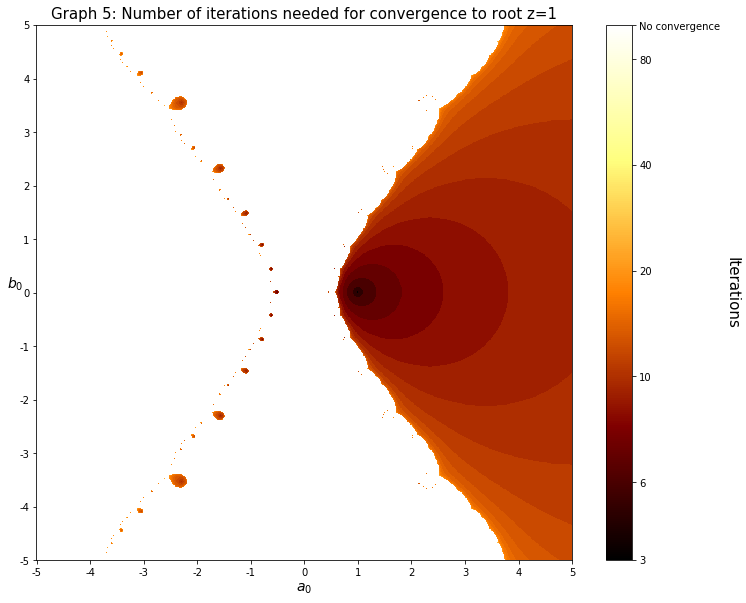

In [17]:
import matplotlib.pyplot as plt

#Employ our function from last task
array=complex_newton(-5, 5, -5, 5, 0, 1000, 10**(-14), 1)

#Display maximum and minimum number of iterations found in kmax. The number of iterations is 100 we
#consider the point not to have converged to the root
print(f'The minimum number of iterations in array is: {int(np.min(array))}')
print(f'The maximim number of iterations in array is: {int(np.max(array))}')



#Set up figure
fig, ax = plt.subplots(figsize=(12,12))

#Set up heatmap plot
im = ax.imshow(np.log10(array), 'afmhot')

# Create colorbar and set various attributes of plot
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.82, ticks=[np.log10(3), np.log10(5), np.log10(10), np.log10(20), \
                                                         np.log10(40), np.log10(80),  np.log10(100)])
cbar.ax.set_yticklabels([3, 6, 10, 20, 40, 80, 'No convergence'])
cbar.ax.set_ylabel('Iterations', fontsize=15, rotation=-90, va="bottom")
ax.set_xticks([i*100 for i in range(0,11)])
ax.set_yticks([i*100 for i in range(0,11)])
ax.set_xticklabels([i-5 for i in range(11)])
ax.set_yticklabels([i-5 for i in range(11)][::-1])
ax.set_xlabel(r'$a_0$', fontsize=14)
ax.set_ylabel(r'$b_0$', rotation='horizontal', fontsize=14)
ax.set_title("Graph 5: Number of iterations needed for convergence to root z=1", fontsize=15)
plt.show()


**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

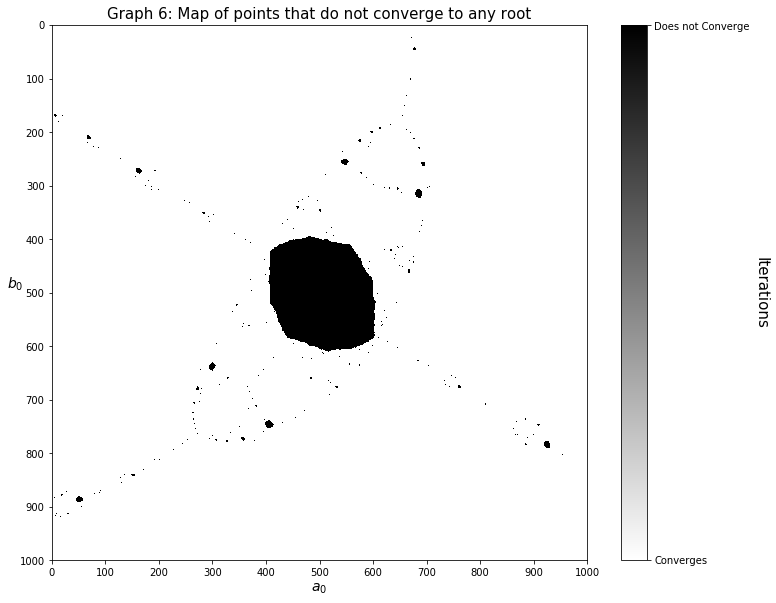

60 values printed for initial guess z=0+0j 
 [ 0.5       +3.j          0.24155673+1.87263883j  0.03562992+0.99710663j
 -0.06030885+0.06103903j  0.79096539-0.53091623j  0.04161722-0.04846122j
  0.78697762-0.5259282j   0.01899958-0.02120356j  0.78485613-0.52142294j
  0.00671985+0.00520531j  0.7842264 -0.52019622j  0.00309431+0.0126698j
  0.78399411-0.52033275j  0.00166669+0.01187714j  0.784045  -0.52037358j
  0.00196939+0.01162254j  0.78404905-0.5203591j   0.00199595+0.01170969j
  0.78404563-0.5203595j   0.00197515+0.01170775j  0.78404601-0.52036019j
  0.00197738+0.0117035j   0.78404613-0.52036005j  0.00197809+0.01170434j
  0.78404609-0.52036004j  0.00197785+0.01170442j  0.78404609-0.52036005j
  0.00197785+0.01170436j  0.78404609-0.52036005j  0.00197787+0.01170437j
  0.78404609-0.52036005j  0.00197786+0.01170437j  0.78404609-0.52036005j
  0.00197786+0.01170437j  0.78404609-0.52036005j  0.00197786+0.01170437j
  0.78404609-0.52036005j  0.00197786+0.01170437j  0.78404609-0.52036005j
  0.001

In [27]:
#set c
c=0.32+1.64*1j

#First we construct the map. All points not equal to 100 are set back to zero. All points equal to 100 are set 1
#in order to normalize the colorbar.
fig, ax = plt.subplots(figsize=(12,12))
array=complex_newton(-0.5, 0.5, -0.5, 0.5, c, 1000, 10**(-14), None)
array[array<100]=0
array[array==100]=1

#Construct heatmap ranging from white to black. Only black and white points appear however, due to what we did above
im = ax.imshow(array, 'binary')

# Create colorbar with the necessary specifications
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.82, ticks=[0, 1])
cbar.ax.set_yticklabels(['Converges', 'Does not Converge'])
cbar.ax.set_ylabel('Iterations', fontsize=15, rotation=-90, va="bottom")
ax.set_xticks([i*100 for i in range(0,11)])
ax.set_yticks([i*100 for i in range(0,11)])
#ax.set_xticklabels([i-5 for i in range(11)])
#ax.set_yticklabels([i-5 for i in range(11)][::-1])
ax.set_xlabel(r'$a_0$', fontsize=14)
ax.set_ylabel(r'$b_0$', rotation='horizontal', fontsize=14)
ax.set_title("Graph 6: Map of points that do not converge to any root", fontsize=15)
plt.show()

#Then print the iterations for a given point which does not converge
#Pick point z0=0.5+3j
zlist=[0.5+3*1j]

#Run 60 iterations of Newton's method on z0=0.5+3j
for i in range(60):
    zlist.append(zlist[-1]-(p(zlist[-1],c)/pp(zlist[-1],c)))

print(f'60 values printed for initial guess z=0+0j \n {np.around(zlist, 10)}')

***📝 Discussion for question 2.3***

The function $p(x)=z^3 + (c-1)z - c$ for $c = 0.32 + 1.64i$ is defined and continuously differentiable everywhere. Thus, non-convergence ocurrs when the initial guess is within a set $S=\{z_k, z_{k+1}, z_{k+2}, z_{k+3}, ...\}$ (where there is no root) which repeats with Newton's method and/or from which the method cannot 'escape'. The reason for this could be that the initial guess may be too far from a root (as described in week 10 tutorial). For the case $z_0=0.5+3i$, we see in the printed list above that after a certain point, the guesses produced converge to a cycle of two points two points $0.00197786+0.01170437i$ and $0.78404609-0.52036005i$.

Initial points with very similar values and derivatives of $p(x)$ can sometimes converge to the same or similar repeating cycles. When this happens, two very close points $z_1$ and $z_2$ get sent to very close points $G(z_1)$ and $G(z_2)$. Further permutations carry on this 'closeness'. The symmetries in Graph 4 are partially a result of this clustering into the same or similar cycles (that do not converge to a root) by points that lie close. However, two points that lie very close can also take completely different "convergence paths" with Newton. In the case where $|S|=2$; let $z_1$ and $z_2$ be two complex numbers such that $G(z_1)=z_2$ and $G(z_2)=z_1$. We then have 
$$
z_1= z_2 - \frac{p(z_2)}{p'(z_2)}
$$
and
$$
z_2= z_1 - \frac{p(z_1)}{p'(z_1)}
$$
Combining these equtions, we write,
$$
z_2= z_2 - \frac{p(z_2)}{p'(z_2)} - \frac{p(z_1)}{p'(z_1)}
$$
$$
\Rightarrow \frac{p(z_2)}{p'(z_2)} = \frac{p(z_1)}{p'(z_1)}
$$
So we see that two points which get 'sent to each other' repeatedly with Newton's method will have the same ratio $p/p'$.


---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [460]:
import numpy as np
import matplotlib.pyplot as plt

#set values:
eps=0.2
gam=0.8
beta=0.7
Is=[0.0, 0.5]


#First define the functions
def f(u, v, I):
    return (1/eps)*(u-((u**3)/3)-v+I)

def g(u,v,I):
    return eps*(u-(gam*v)+beta)


def resting_state(u, v, I):

    #Set up array for the current guess:
    guess=np.array([u,v])
    
    #define the jacobian
    def Jac(u,v):
        return np.array([[(1/eps)-((u**2)/eps), -(1/eps)], [eps, -eps*gam]])
    
    #Define function which returns vector of g(u,v) and f(u,v) for given guesses
    def F(u,v):
        return np.array([f(u, v, I), g (u, v, I)])

    #Run newton's method in for the two equations until solution found
    while abs(np.linalg.norm(F(guess[0], guess[1])))>10**(-14):
        e=-np.linalg.solve(Jac(guess[0],guess[1]), F(guess[0],guess[1]))
        guess=e+guess
        
    #Return guess
    return guess
    

for i in Is:
    state=resting_state(0.2, 0.2, i)
    print(f'For I={i} we have resting states u*={round(state[0], 4)} and v*={round(state[1], 4)}') 

For I=0.0 we have resting states u*=-1.1994 and v*=-0.6243
For I=0.5 we have resting states u*=-0.8048 and v*=-0.1311


**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

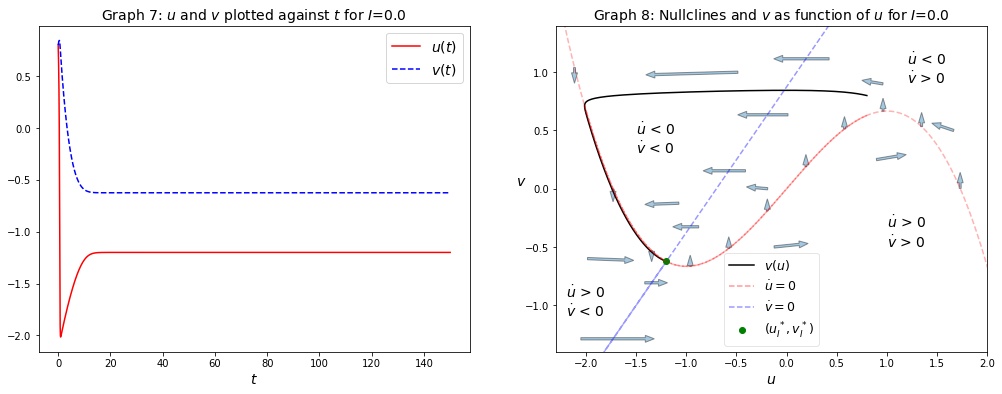

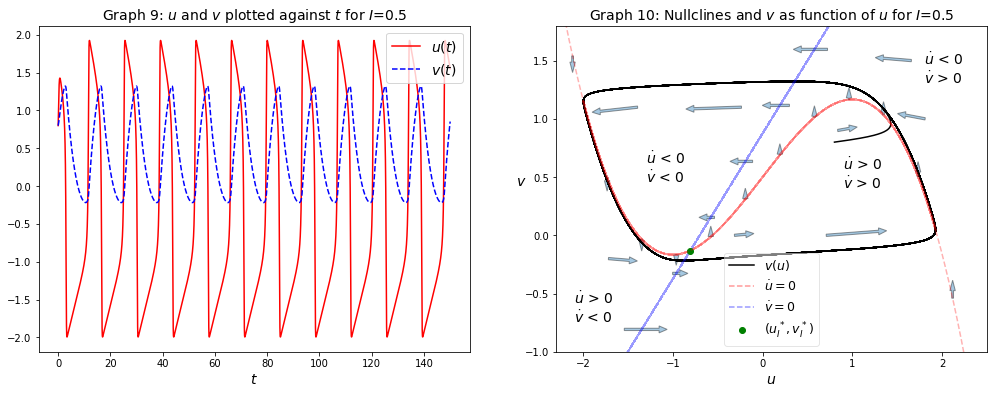

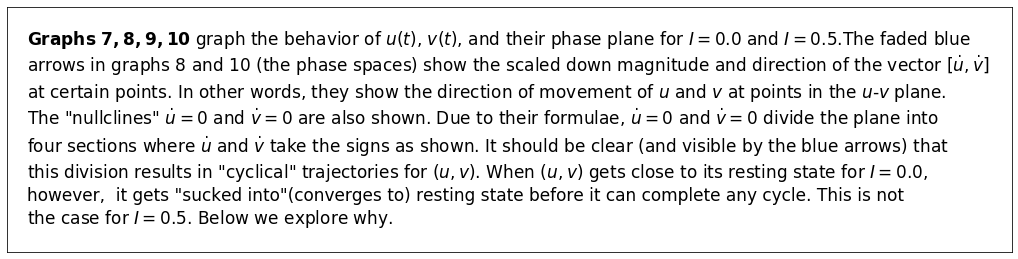

In [489]:

def find_points(start, end, dt, initial, I):
    '''Function which finds the points of u and v given
    initial condition by forward Euler method. Start/end 
    is in terms of t. dt is time step. '''
    u=[initial[0]]
    v=[initial[1]]
    t=np.linspace(start, end, int(((end-start)/dt)+1))
    
    #Forward Euler implemented at each point until 'end' reached
    for i in range(len(t)-1):
        u.append(((dt/eps)*(u[-1]-((u[-1]**3)/3)-v[-1]+I))+u[-1])
        v.append((dt*eps*(u[-1]-gam*v[-1]+beta))+v[-1])
        
    #return t, u, and v as np.arrays
    return np.array(t),np.array(u),np.array(v)

#Now for the fun part: the plotting
#Make similar plot for each I
for i in Is:
    fig, ax = plt.subplots(1,2, figsize=(17,6))
    t,u,v=find_points(0, 150, 0.01, [0.8,0.8], i)

    #In first graph we plot u and v against t
    #This will demonstrate if u and v converge to their resting states
    ax[0].plot(t,u, 'r', label=r'$u(t)$')
    ax[0].plot(t,v, 'b--', label=r'$v(t)$')
    ax[0].legend(loc='upper right', fontsize=14)
    ax[0].set_xlabel(r'$t$', fontsize=14)

    #Set titles for the Graphs
    if i==0:
        ax[0].set_title(f'Graph 7: $u$ and $v$ plotted against $t$ for $I$={i}', fontsize=14)
        
    if i==0.5:
        ax[0].set_title(f'Graph 9: $u$ and $v$ plotted against $t$ for $I$={i}', fontsize=14)
        
    #Now plot v against u in ax[1]
    ax[1].plot(u,v, 'black', label=r'$v(u)$')
    
    #We plot du/dt=0 and dv/dt=0 in the same plane
    #du/dt=0 and dv/dt=0 are denoted as NULLCLINES
    #Set alpha to 0.4 so as not to take away all the attention from u and v
    v_cline= ((u+beta)/gam)
    u_cline0= (u-((u**3)/3)+i)
    ax[1].plot(u, u_cline0, 'r--', label= r'$\dot u=0$', alpha=0.4)
    ax[1].plot(u, v_cline, 'b--', label= r'$\dot v=0$', alpha=0.4)
    
    #plot resting state where we have du/dt=dv/dt=0
    ax[1].plot(resting_state(0.8,0.8,i)[0], resting_state(0.8,0.8,i)[1], 'go', label=r'$(u_I^*, v_I^*)$')
    
    #We want the u-nullcline over entire figure. Thus set up an extra array 
    #with which to plot it again. Set alpha to 0.3 so that the u-nullcline will be darker at the points
    #where du/dt=0 'has actually been' for a given starting value and trajectory. This last part is why I
    #have chosen to plot the u-nullcline twice
    anarray=np.linspace(-3,3,1000)
    u_cline1= (anarray-((anarray**3)/3)+i)
    ax[1].plot(anarray, u_cline1, 'r--', alpha=0.3)
    ax[1].set_xlabel(r'$u$', fontsize=14)
    ax[1].set_ylabel(r'$v$', fontsize=14, rotation='horizontal')
    
    #Set titles of second graph
    if i==0:
        ax[1].set_title(f'Graph 8: Nullclines and $v$ as function of $u$ for $I$={i}', fontsize=14)
    if i==0.5:
        ax[1].set_title(f'Graph 10: Nullclines and $v$ as function of $u$ for $I$={i}', fontsize=14)
    ax[1].legend(loc='lower center', fontsize=12.5, framealpha=0.5)
    
    #Create array of some spots along nullclines where we will place arrows
    #to demonstrate direction and magnitude of vector [du/dt, dv/dt]
    u_spots=np.linspace(-2.5,2.5, 14)
    u_arrows= (u_spots-((u_spots**3)/3)+i)
    v_arrows = ((u_spots+beta)/gam)
    u_arrow_coords=list(zip(u_spots,u_arrows))
    v_arrow_coords=list(zip(u_spots,v_arrows))
    
    #Set arrows. Each I has a slightly different figure so there are special coordinates for the arrows.
    #Notice that I am "sending the arrows" in a direction and with a magnitude directly calculated with the 
    #f(u,v,I) and g(u,v,I) functions. I am also scaling down f(u,v,I) and g(u,v,I) so that the errors are not too large
    if i==0:
        for k in [[0.9,0.9],[-0.9,1],[-1.8,-0.6],[0,-0.5],[-1.1994, -0.1243], [1,0.25], [-0.25,0],\
                  [1.6,0.5]]+u_arrow_coords + v_arrow_coords:
            ax[1].arrow(k[0]-0.05*f(k[0],k[1],i), k[1], 0.1*f(k[0],k[1],i), 0.1*g(k[0],k[1],i),\
                        width=0.02, head_width=0.06, alpha=0.4)
    if i==0.5:
        for k in [[0.9,0.9],[-0.5,1.1],[-1.6,-0.2],[-1.6,1.1], [1,0], [-0.25,0],[1.7,1],\
                  [1.5,1.5]]+u_arrow_coords + v_arrow_coords:
            ax[1].arrow(k[0]-0.05*f(k[0],k[1],i), k[1], 0.1*f(k[0],k[1],i), 0.1*g(k[0],k[1],i),\
                        width=0.02, head_width=0.06, alpha=0.4)
    
    #Set slightly different limits for each I because we want to demonstrate and highlight 
    #slightly different behaviours of (u,v)
    if i==0:
        ax[1].set_ylim([-1.4, 1.4])
        ax[1].set_xlim([-2.3, 2])
    else:
        ax[1].set_ylim([-1, 1.8])
        ax[1].set_xlim([-2.3, 2.5])
     
    #Establish 'text points' to be used to identify the four regions that the nullclines divide the u-v plane into
    if i==0:
        text_points=[[-1.5,0.3],[1.2,0.9],[1,-0.5],[-2.2,-1.1]]
        
    if i==0.5:
        text_points=[[-1.3,0.45],[1.8,1.3],[0.9,0.4],[-2.1,-0.75]]
    
    difference_ops=[['<','<'],['<','>'],['>','>'],['>','<']]
        
    #Set text in ax[1] so as to demonstrate the signs of du/dt and dv/dt in each region
    for q in range(4):
        ax[1].text(text_points[q][0],text_points[q][1], r'$\dot{u}$ ' +f'{difference_ops[q][0]} 0 \n'\
                   + r'$\dot{v}$ ' +f'{difference_ops[q][1]} 0', fontsize=14)
        
    #Finally, we can show the thing
    plt.show()
  
#Write some text which will give a better description of the set of graphs:
t=r'$\bf Graphs$ $\bf 7,8,9,10$ graph the behavior of $u(t)$, $v(t)$, and their phase plane for $I=0.0$ and $I=0.5$.'\
    'The faded blue \narrows in graphs 8 and 10 (the phase spaces) show the scaled down magnitude and direction of the vector'\
    ' $[\dotu,\dotv]$\nat certain points. In other words, they show the direction of movement of $u$ and $v$ at '\
    'points in the $u$-$v$ plane. \nThe "nullclines" $\dot u=0$ and $\dot v=0$ are also shown. Due to their formulae,'\
    ' $\dotu=0$ and $\dotv=0$ divide the plane into \nfour sections where $\dotu$ and $\dotv$ take the signs as shown. '\
    'It should be clear (and visible by the blue arrows) that \nthis division results in "cyclical" trajectories for '\
    '$(u,v)$. When $(u,v)$ gets close to its resting state for $I=0.0$, \nhowever,  it gets "sucked into"'\
    '(converges to) resting state before it can complete any cycle. This is not \nthe case for $I=0.5$.'\
    ' Below we explore why.'
    
#Make a separate graph for the text description:
fig= plt.figure(figsize=(18,4.5))
plt.figtext(0.14,0.21,t, fontsize=17)
plt.tick_params(axis='x', bottom=False,labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.show()


***📝 Discussion for question 3.2***

Denote ${\mathbf{J}}_{*,I}$ as in 3.3. Let
$$
{\bf x} =
\begin{bmatrix}
u \\
v
\end{bmatrix}
$$
and
$$
\frac{d{\mathbf{x}}}{dt}=
\begin{bmatrix}
f(u,v) \\
g(u,v)
\end{bmatrix}
$$

For $(u, v)$ $\bf near$ resting states $(u^*_I, v^*_I)$, we have vector equation

$$
\frac{d{\mathbf{x}}}{dt} \approx \frac{d{\mathbf{x}_{*,I}}}{dt} + {\mathbf{J}_{*,I}} ({\mathbf{x}} - {\mathbf{x}}_{*,I})
$$

by Taylor expansion truncated to first order for the equations $f(u,v)$ and $g(u,v)$ (as in week 10 tutorial). Since

$$
\frac{d\mathbf{x_{*,I}}}{dt}=\bf{0}, 
$$
we have
$$
\frac{d\mathbf{x}}{dt} \approx \mathbf{J_{*,I}} (\mathbf{x} - \mathbf{x}_{*,I})
$$

Now write $(\mathbf{x} - \mathbf{x}_{*,I})=\delta \bf{x}$ to demonstrate that we are estimating $f(u,v)$ and $g(u,v)$ at some small perturbation of $\delta$ from $(u^*_I, v^*_I)$. Since $(u^*_I, v^*_I)$ is constant, write
$$
\frac{d{\mathbf{x}}}{dt}=
\begin{bmatrix}
f(u,v) \\
g(u,v)
\end{bmatrix} =
\begin{bmatrix}
\frac{du}{dt} \\
\frac{dv}{dt}
\end{bmatrix} =
\frac{d \delta {\bf{x}}}{dt}
$$
Thus,
$$
\frac{d \delta {\bf{x}}}{dt} \approx {\mathbf{J}_{*,I}} (\delta {\bf{x}}) \hspace{3cm} (1)
$$

We test $\delta {\bf{x}} = {\mathbf{\xi}} e^{r*t}$, for some vector $\mathbf{\xi}$, as a solution to $(1)$:

$$
r {\bf{\xi}} e^{rt} = {\bf{J}}_{*,I} {\bf{\xi}} e^{rt}
$$

$$
\Rightarrow ({\bf{J}}_{*,I}-r{\bf{I}})\bf{\xi}=\bf{0}
$$

We see that the $(1)$ takes solutions of the type $\xi e^{r*t}$, where $\xi$ and $r$ are corresponding eigenvectors and eigenvalues of $J_{*,I}$. 
If $J_{*,I}$ has complex eigenvectors and eigenvalues, $\xi={\bf{a}} + i \bf{b}$ and $r=c+id$, then by Euler's formula:

$$
\delta {\bf{x}} =
\begin{bmatrix}
a_1 + i b_1 \\
a_2 + i b_2
\end{bmatrix} e^{(c+id)t} = 
\begin{bmatrix}
a_1 + i b_1 \\
a_2 + i b_2
\end{bmatrix} e^{ct}\big(\cos(d·t) + i\sin(d*t)\big) =
\begin{bmatrix}
e^{ct}a_1\cos(d*t) - e^{ct}b_1\sin(d*t)\\
e^{ct}a_2\cos(d*t) - e^{ct}b_2 \sin(d*t)
\end{bmatrix} + i
\begin{bmatrix}
e^{ct}a_1 \sin(d*t) + e^{ct} b_1 \cos(d*t)\\
e^{ct}a_2 \sin(d*t) + e^{ct} b_2 \cos(d*t)
\end{bmatrix}
$$

Both real and imaginary parts must be solutions to satisfy $(1)$. Consequently, solutions are

$$
\delta {\bf{x}} = {\bf \xi} e^{rt} \qquad \qquad \qquad \qquad \qquad \hspace{0.4cm} \text{(real } {\bf{\xi}} \text{ and r)}
$$

$$
\delta {\bf{x}} = 
\begin{bmatrix}
a_1\cos(d*t) - b_1\sin(d*t)\\
a_2\cos(d*t) - b_2 \sin(d*t)
\end{bmatrix}e^{ct}  \qquad \text{(complex } {\bf{\xi}} \text{ and r)}
$$

Thus, when $Re(r)<0$, and $\underline{\textit{if}} \hspace{0.2cm} (u,v)$ come close to $(u^*_I, v^*_I)$, $(u,v)$ will 'get sucked in' and converge to $(u^*_I, v^*_I)$ as $t$ increases. When $Re(r)>0$, $(u,v)$ will be unstable close to $(u^*_I, v^*_I)$, as seen in formula solution for $\delta {\bf{x}}$. Essentially, $(u,v)$ will get 'pushed away' from $(u^*_I, v^*_I)$ and proceed oscillating in a manner determined by $\dot u, \dot v$, as seen in graph 10.

See eigenvalues of ${\mathbf{J}}_{*,I}$ in 3.3. When $I=0$, we have case where $Re(r)<0$, and so we have convergence to $(u^*_I,v^*_I)$ as seen in graphs 7 and 8.  When $I=0.5$, we have case where $Re(r)>0$, and so we have oscillating $(u,v)$ as seen in graphs 9 and 10. 

Source: Graphs 8 and 10 and above argument partially inspired by \\      
"EBME 309, Spring 2003 Two-dimensional dynamics" \\    
Otani, Niels F. \\  
Printed: February 10th, 2003 \\   
Accessed: April 6th 2021 \\  
URL:http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/CardiacDynamics/Niels_2d_dyn_notes.pdf

**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [392]:
def Jac(u,v):
    return np.array([[(1/eps)-((u**2)/eps), -(1/eps)], [eps, -eps*gam]])

for i in Is:
    state=resting_state(0.8,0.8, i)
    J=Jac(state[0],state[1])
    print(f'Jacobi for I={i}: \n{J}')
    print(f'Eigenvalues are: {round(np.linalg.eigvals(J)[0],4), round(np.linalg.eigvals(J)[1],4)}')
    print()

Jacobi for I=0.0: 
[[-2.19289818 -5.        ]
 [ 0.2        -0.16      ]]
Eigenvalues are: (-1.3586, -0.9943)

Jacobi for I=0.5: 
[[ 1.76110052 -5.        ]
 [ 0.2        -0.16      ]]
Eigenvalues are: ((0.8006+0.2781j), (0.8006-0.2781j))



***📝 Discussion for question 3.3***

As described in section 3.2, when $(u,v)$ is close to $(u^*_I, v^*_I)$, their difference $\delta {\bf{x}}$ is well described by 

$$
\delta {\bf{x}} = {\bf{\xi}}e^{rt} \qquad \text{or} \quad \delta {\bf{x}} = 
\begin{bmatrix}
e^{ct}a_1\cos(d*t) - e^{ct}b_1\sin(d*t)\\
e^{ct}a_2\cos(d*t) - e^{ct}b_2 \sin(d*t)
\end{bmatrix}.
$$

For $I=0.0$, the eigenvalues of ${\bf{J}}_{*,I}$ are real and negative. Thus, as described in 3.2, the first formula for $\delta {\bf{x}}$ is appropriate (when $(u,v)$ is close to $(u^*_I, v^*_I)$). We then have that if $(u,v)$ gets sufficiently close to $(u^*_I, v^*_I)$, it will converge to $(u^*_I, v^*_I)$ (as $t$ increases). 

For $I=0.5$, the eigenvalues of ${\bf{J}}_{*,I}$ are complex with positive real part. Thus, as described in 3.2, the second formula for $\delta {\bf{x}}$ is appropriate (when $(u,v)$ is close to $(u^*_I, v^*_I)$). We then have that if $(u,v)$ gets sufficiently close to $(u^*_I, v^*_I)$, $(u, v)$ should be 'repelled' from $(u^*_I, v^*_I)$ as $t$ increases.

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

For uv0=[0.9 0.6]:
Resting state is [1.45290169 0.43058034]
Jacobi at resting state: 
[[-5.55461659 -5.        ]
 [ 0.2        -1.        ]]
Eigenvalues: (-5.3233, -1.2313)

For uv0=[0.  0.4]:
Resting state is [0.17732319 0.17546464]
Jacobi at resting state: 
[[ 4.84278243 -5.        ]
 [ 0.2        -1.        ]]
Eigenvalues: (4.6663, -0.8235)

For uv0=[-1.7 -0.3]:
Resting state is [-1.63022488 -0.18604498]
Jacobi at resting state: 
[[-8.28816584 -5.        ]
 [ 0.2        -1.        ]]
Eigenvalues: (-8.1483, -1.1399)




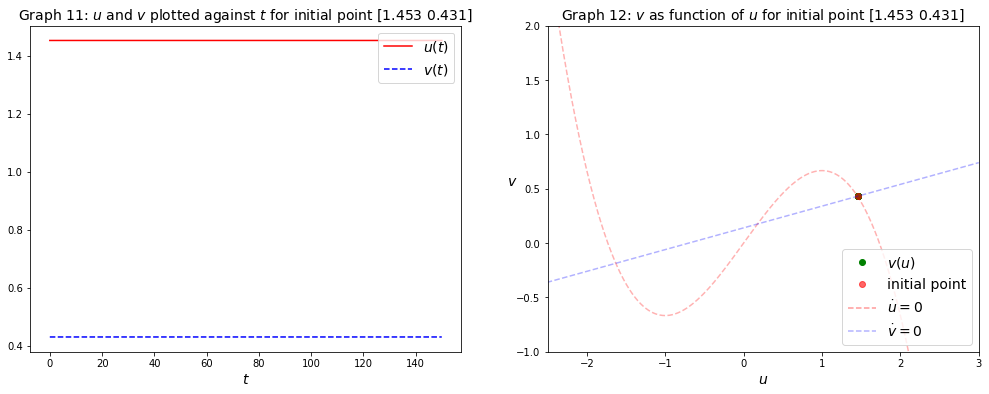

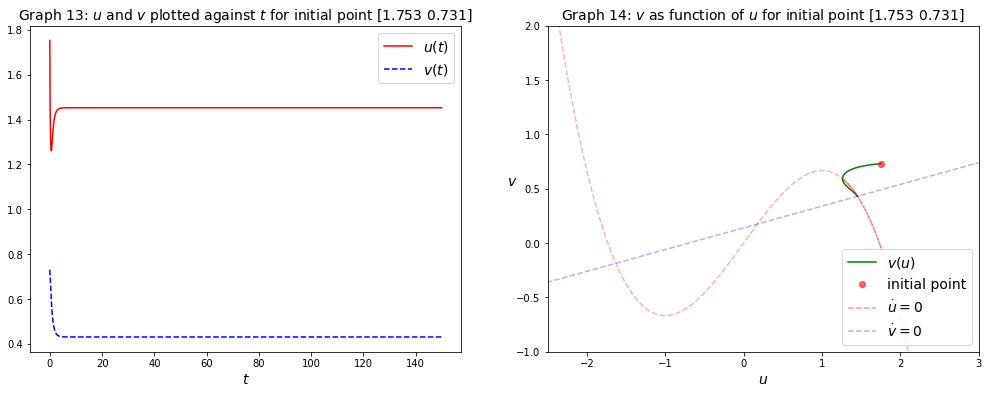

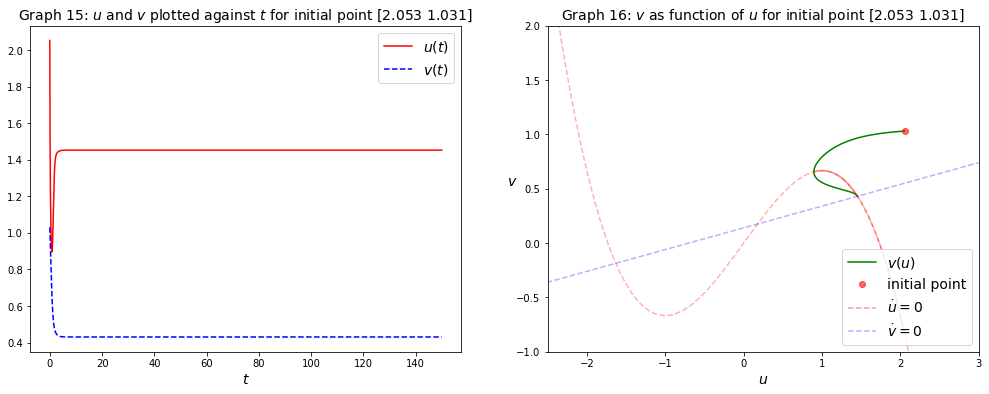

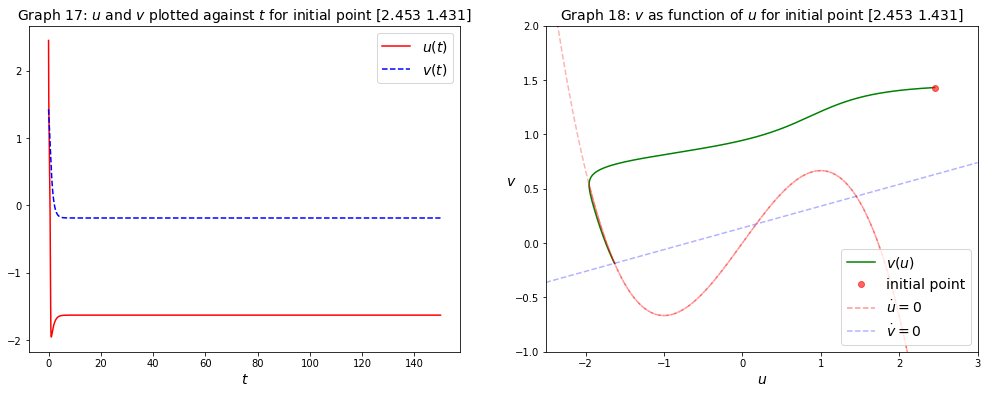

In [499]:
import numpy as np
gam=5 #change gamma

# Initial conditions
uv0 = np.array([[0.9, 0.6], [0., 0.4], [-1.7, -0.3]])

#Loop over uv0 to print some important results
for p in uv0:
    print(f'For uv0={p}:')
    state=resting_state(p[0],p[1],0)
    J=Jac(state[0],state[1])
    
    #Print resting states that Newton's method will find for different starting points in uv0
    print(f'Resting state is {state}')
    
    #Print also the resultant Jacobian at these resting states and the eigenvalues of this Jacobian
    print(f'Jacobi at resting state: \n{J}')
    print(f'Eigenvalues: {round(np.linalg.eigvals(J)[0],4), round(np.linalg.eigvals(J)[1],4)}')
    print()
    
print() #add some spacing between results and graphs

#Set up delta array and a list of lists for the graph numbers
delta=np.array([0,0.3,0.6,1])
graph_numbers=[[11,12],[13,14],[15,16],[17,18]]

for d in delta:
    #find the index of d in delta so as to be able to pick correctly from graph_numbers
    index_d=np.where(delta==d)[0][0]
    
    #Set up figure with two axes for each d
    fig, ax = plt.subplots(1,2, figsize=(17,6))
    resting=resting_state(uv0[0,0],uv0[0,1],0)
    
    #In a similar manner as in 3.2, we plot u and v against t
    t,u,v=find_points(0, 150, 0.001, resting+d, 0)
    ax[0].plot(t,u, 'r', label=r'$u(t)$')
    ax[0].plot(t,v, 'b--', label=r'$v(t)$')
    ax[0].set_title(f'Graph {graph_numbers[index_d][0]}: $u$ and $v$ plotted against $t$ for initial point {np.around(resting+d,3)}', fontsize=14)
    ax[0].legend(loc='upper right', fontsize=14)
    ax[0].set_xlabel(r'$t$', fontsize=14)
    
    #In second graph we plot v as function of u in u-v plane. We want to show a single point for the case where we 
    #start off at a resting state, and so we implement the following condition:
    if d==0:
        ax[1].plot(u,v, 'go', label=r'$v(u)$')
    else:
        ax[1].plot(u,v, 'g', label=r'$v(u)$')
        
    #Set labels etc...
    ax[1].set_xlabel(r'$u$', fontsize=14)
    ax[1].set_ylabel(r'$v$', fontsize=14, rotation='horizontal')
    ax[1].set_title(f'Graph {graph_numbers[index_d][1]}: $v$ as function of $u$ for initial point {np.around(resting+d,3)}', fontsize=14)
    ax[1].legend(loc='upper right', fontsize=14)
    
    
    #Mark the starting point
    ax[1].plot(resting[0]+d, resting[1]+d, 'ro', label='initial point', alpha=0.6)
    
    #We plot the nullclines in exactly the same manner as in 3.2:
    anarray=np.linspace(-3,3,1000)
    u_cline0= (u-((u**3)/3)+0)
    u_cline1= (anarray-((anarray**3)/3)+0)
    v_cline0= ((u+beta)/gam)
    v_cline1= ((anarray+beta)/gam)
    ax[1].plot(u, u_cline0, 'r--', label= r'$\dot u=0$', alpha=0.4)
    ax[1].plot(anarray, u_cline1, 'r--', alpha=0.3)
    ax[1].plot(anarray, v_cline1, 'b--', alpha=0.3, label=r'$\dot v=0$')
    ax[1].set_xlabel(r'$u$', fontsize=14)
    ax[1].set_ylabel(r'$v$', fontsize=14, rotation='horizontal')

    ax[1].legend(loc='lower right', fontsize=14)
    
    #Set appropriate limits that show all resting states and trajectories that we observe
    ax[1].set_ylim([-1,2])
    ax[1].set_xlim([-2.5,3])
        
    #Finally, show the graphs
    plt.show()


***📝 Discussion for question 3.4***

Resting states are points where $\dot u=\dot v=0$. With $\gamma = 5$, there are three resting states in the $u-v$ plane. Which one we arrive at with Newton's method depends on the starting point $(u_0,v_0)$. Below we use the same notation and continue in same manner of analysis as in 3.2. 

For $\delta\in\{ 0,0.3,0.6\}$ (Graphs 11-16), $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$ is on a trajectory that meets, or is very close to resting state $(u_{(0)}^*, v_{(0)}^*)$. Close to $(u_{(0)}^*, v_{(0)}^*)$, $\delta {\bf{x}}={\bf{\xi}}e^{rt}$ is a good estimation of the movement of $(u,v)$ relative to $(u_{(0)}^*, v_{(0)}^*)$ (see above that we have real negative eigenvalues). Thus, as described in 3.2, solution $(u,v)$ gets 'sucked into' $(u_{(0)}^*, v_{(0)}^*)$ when its trajectory comes close.

For $\delta=1$, $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$ is on a trajectory which does not come sufficiently close to the fixed point $(u_{(0)}^*, v_{(0)}^*)$ to get 'sucked in' (remember: estimation $\delta {\bf{x}}={\bf{\xi}}e^{rt}$ is only valid close to $(u_{(0)}^*, v_{(0)}^*)$). Instead, its trajectory carries it close to another fixed point $(u_{(2)}^*, v_{(2)}^*)=(-1.63022488 -0.18604498)$, at which the Jacobian also has negative eigenvalues (see printed eigenvalues). Thus, the solution gets 'sucked in' and ends up at $(u_{(2)}^*, v_{(2)}^*)$ instead.

NameError: name 'pyppeteer' is not defined